In [14]:
import pandas as pd

df = pd.read_csv("superstore.csv")
df.head()


,Order ID,Order Date,Ship Date,Customer ID,Segment,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,rw-7165-72015,2023-07-07,2023-07-08,NE-21624,Home Office,Central,Technology,Phones,Apple iPhone SE 2022,826.82,5,0.2,9.31
1,Rg-5604-66747,2025-02-22,2025-02-23,EX-59504,Home Office,South,Office Supplies,Binders,Heavy-Duty Binder,987.08,7,0.1,90.31
2,VA-2677-91007,2024-02-18,2024-02-20,nF-31645,Home Office,West,Furniture,Chairs,Ergonomic Chair X1,812.64,2,0.0,185.65
3,Mv-2681-79724,2024-05-18,2024-05-20,tD-21391,Home Office,Central,Office Supplies,Binders,Heavy-Duty Binder,558.19,9,0.2,-6.27
4,XM-8467-43494,2024-11-16,2024-11-17,vV-46818,Corporate,South,Office Supplies,Binders,3-Ring Binder,50.39,5,0.2,-0.80


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1000 non-null   object 
 1   Order Date    1000 non-null   object 
 2   Ship Date     1000 non-null   object 
 3   Customer ID   1000 non-null   object 
 4   Segment       1000 non-null   object 
 5   Region        1000 non-null   object 
 6   Category      1000 non-null   object 
 7   Sub-Category  1000 non-null   object 
 8   Product Name  1000 non-null   object 
 9   Sales         1000 non-null   float64
 10  Quantity      1000 non-null   int64  
 11  Discount      1000 non-null   float64
 12  Profit        1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [16]:
df.dropna(inplace=True)

In [17]:
# Assuming 'Quantity' sold = turnover proxy and 'Sales' = revenue proxy
df['Inventory_Days'] = df['Quantity'] * 10  # Assumed average stock cycle

# Correlation between Inventory_Days and Profit
corr = df[['Inventory_Days', 'Profit']].corr()
print("Correlation:\n", corr)


Correlation:
                 Inventory_Days   Profit
Inventory_Days         1.00000 -0.01353
Profit                -0.01353  1.00000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

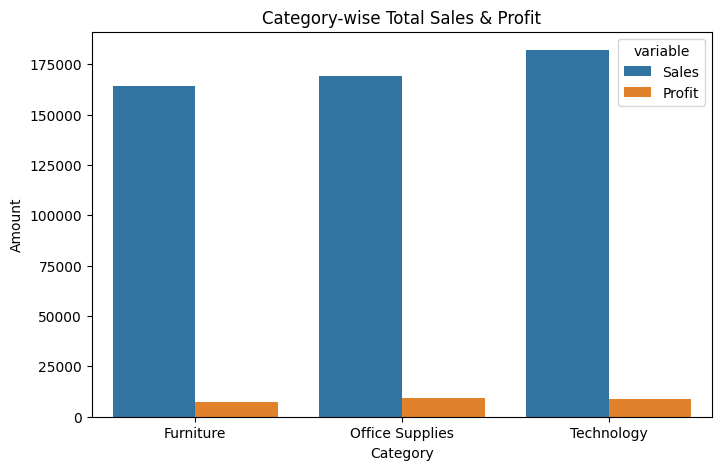

In [19]:
# 1. Category-wise Profit vs Sales
plt.figure(figsize=(8, 5))
sns.barplot(data=df.groupby('Category')[['Sales', 'Profit']].sum().reset_index().melt(id_vars='Category'),
            x='Category', y='value', hue='variable')
plt.title("Category-wise Total Sales & Profit")
plt.ylabel("Amount")
plt.show()

C:\Users\harendra\AppData\Local\Temp\ipykernel_6308\783353106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False),


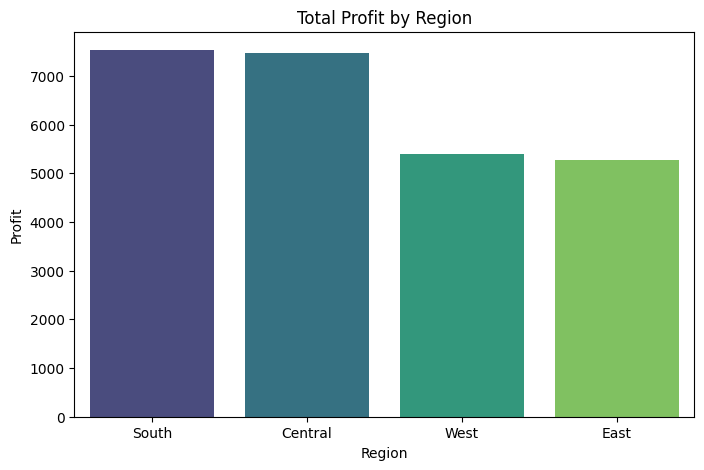

In [20]:
# 2. Region-wise Total Profit
plt.figure(figsize=(8, 5))
sns.barplot(data=df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False),
            x='Region', y='Profit', palette='viridis')
plt.title("Total Profit by Region")
plt.show()

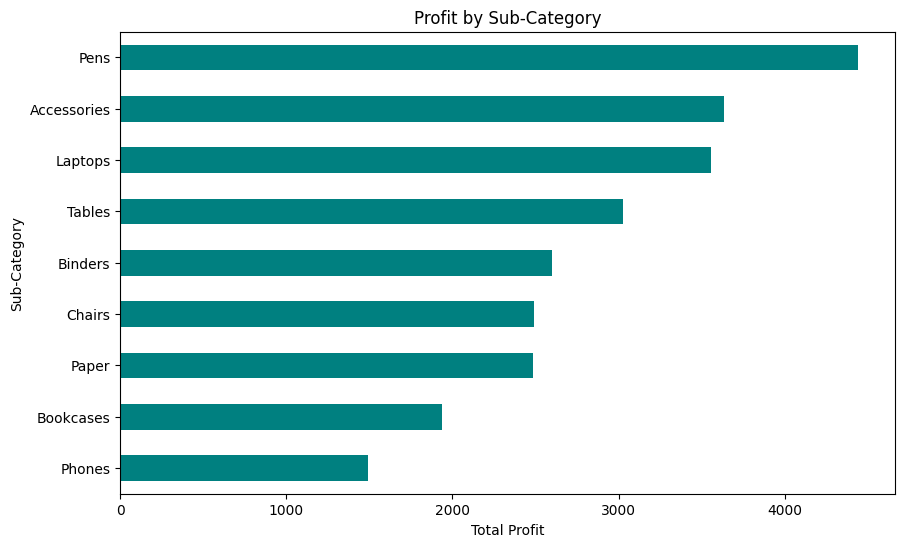

In [21]:
# 3. Sub-Category Profitability
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
plt.figure(figsize=(10, 6))
subcat_profit.plot(kind='barh', color='teal')
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.show()

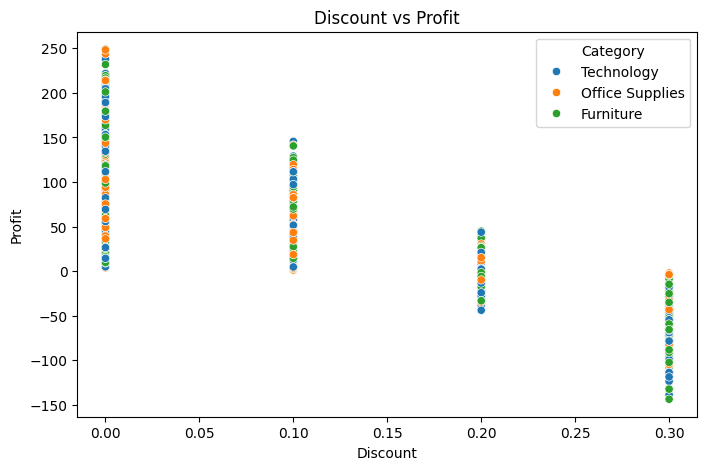

In [22]:
# 4. Discount vs Profit Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit")
plt.show()

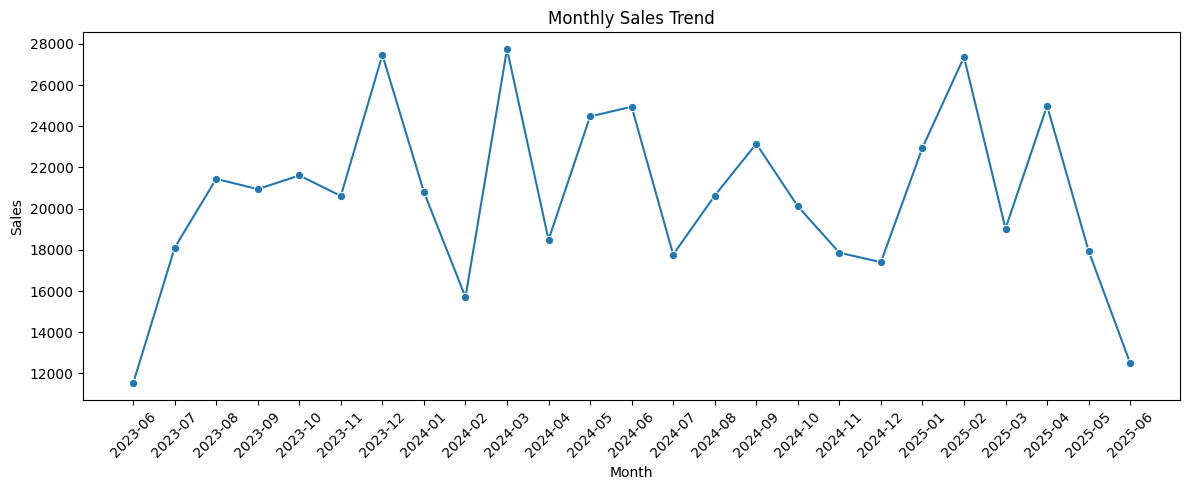

In [24]:
# 5. Monthly Sales Trend
# Convert to datetime first
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Month-Year Period
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Plot

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

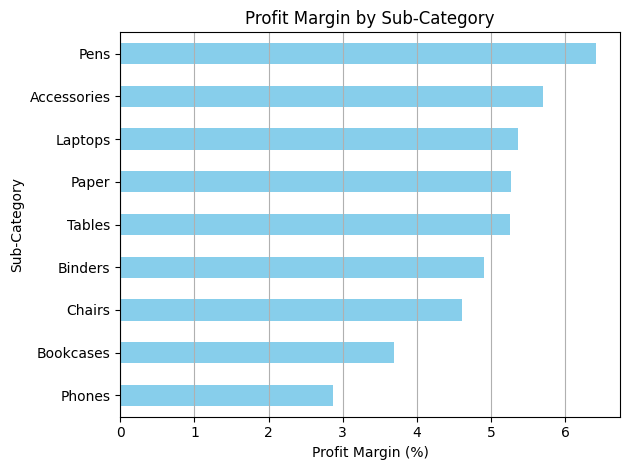

In [25]:
# Sub-Category vs Profit Margin
data = {
    'Sub-Category': ['Phones', 'Bookcases', 'Chairs', 'Binders', 'Tables', 'Paper', 'Laptops', 'Accessories', 'Pens'],
    'Profit Margin': [2.87, 3.69, 4.61, 4.90, 5.26, 5.27, 5.37, 5.70, 6.42]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
df.sort_values('Profit Margin').plot(x='Sub-Category', y='Profit Margin', kind='barh', legend=False, color='skyblue')
plt.title("Profit Margin by Sub-Category")
plt.xlabel("Profit Margin (%)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


📉 "Phones have high sales but very low profit margin — consider increasing price or lowering discount rates."

🟢 "Pens and Accessories are high-margin — consider expanding SKUs or marketing them."